In [9]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/66?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 2388
Some examples: [('土雞', '老薑'), ('土雞', '紅棗'), ('土雞', '枸杞'), ('土雞', '麻油'), ('土雞', '冰糖'), ('土雞', '鹽')]


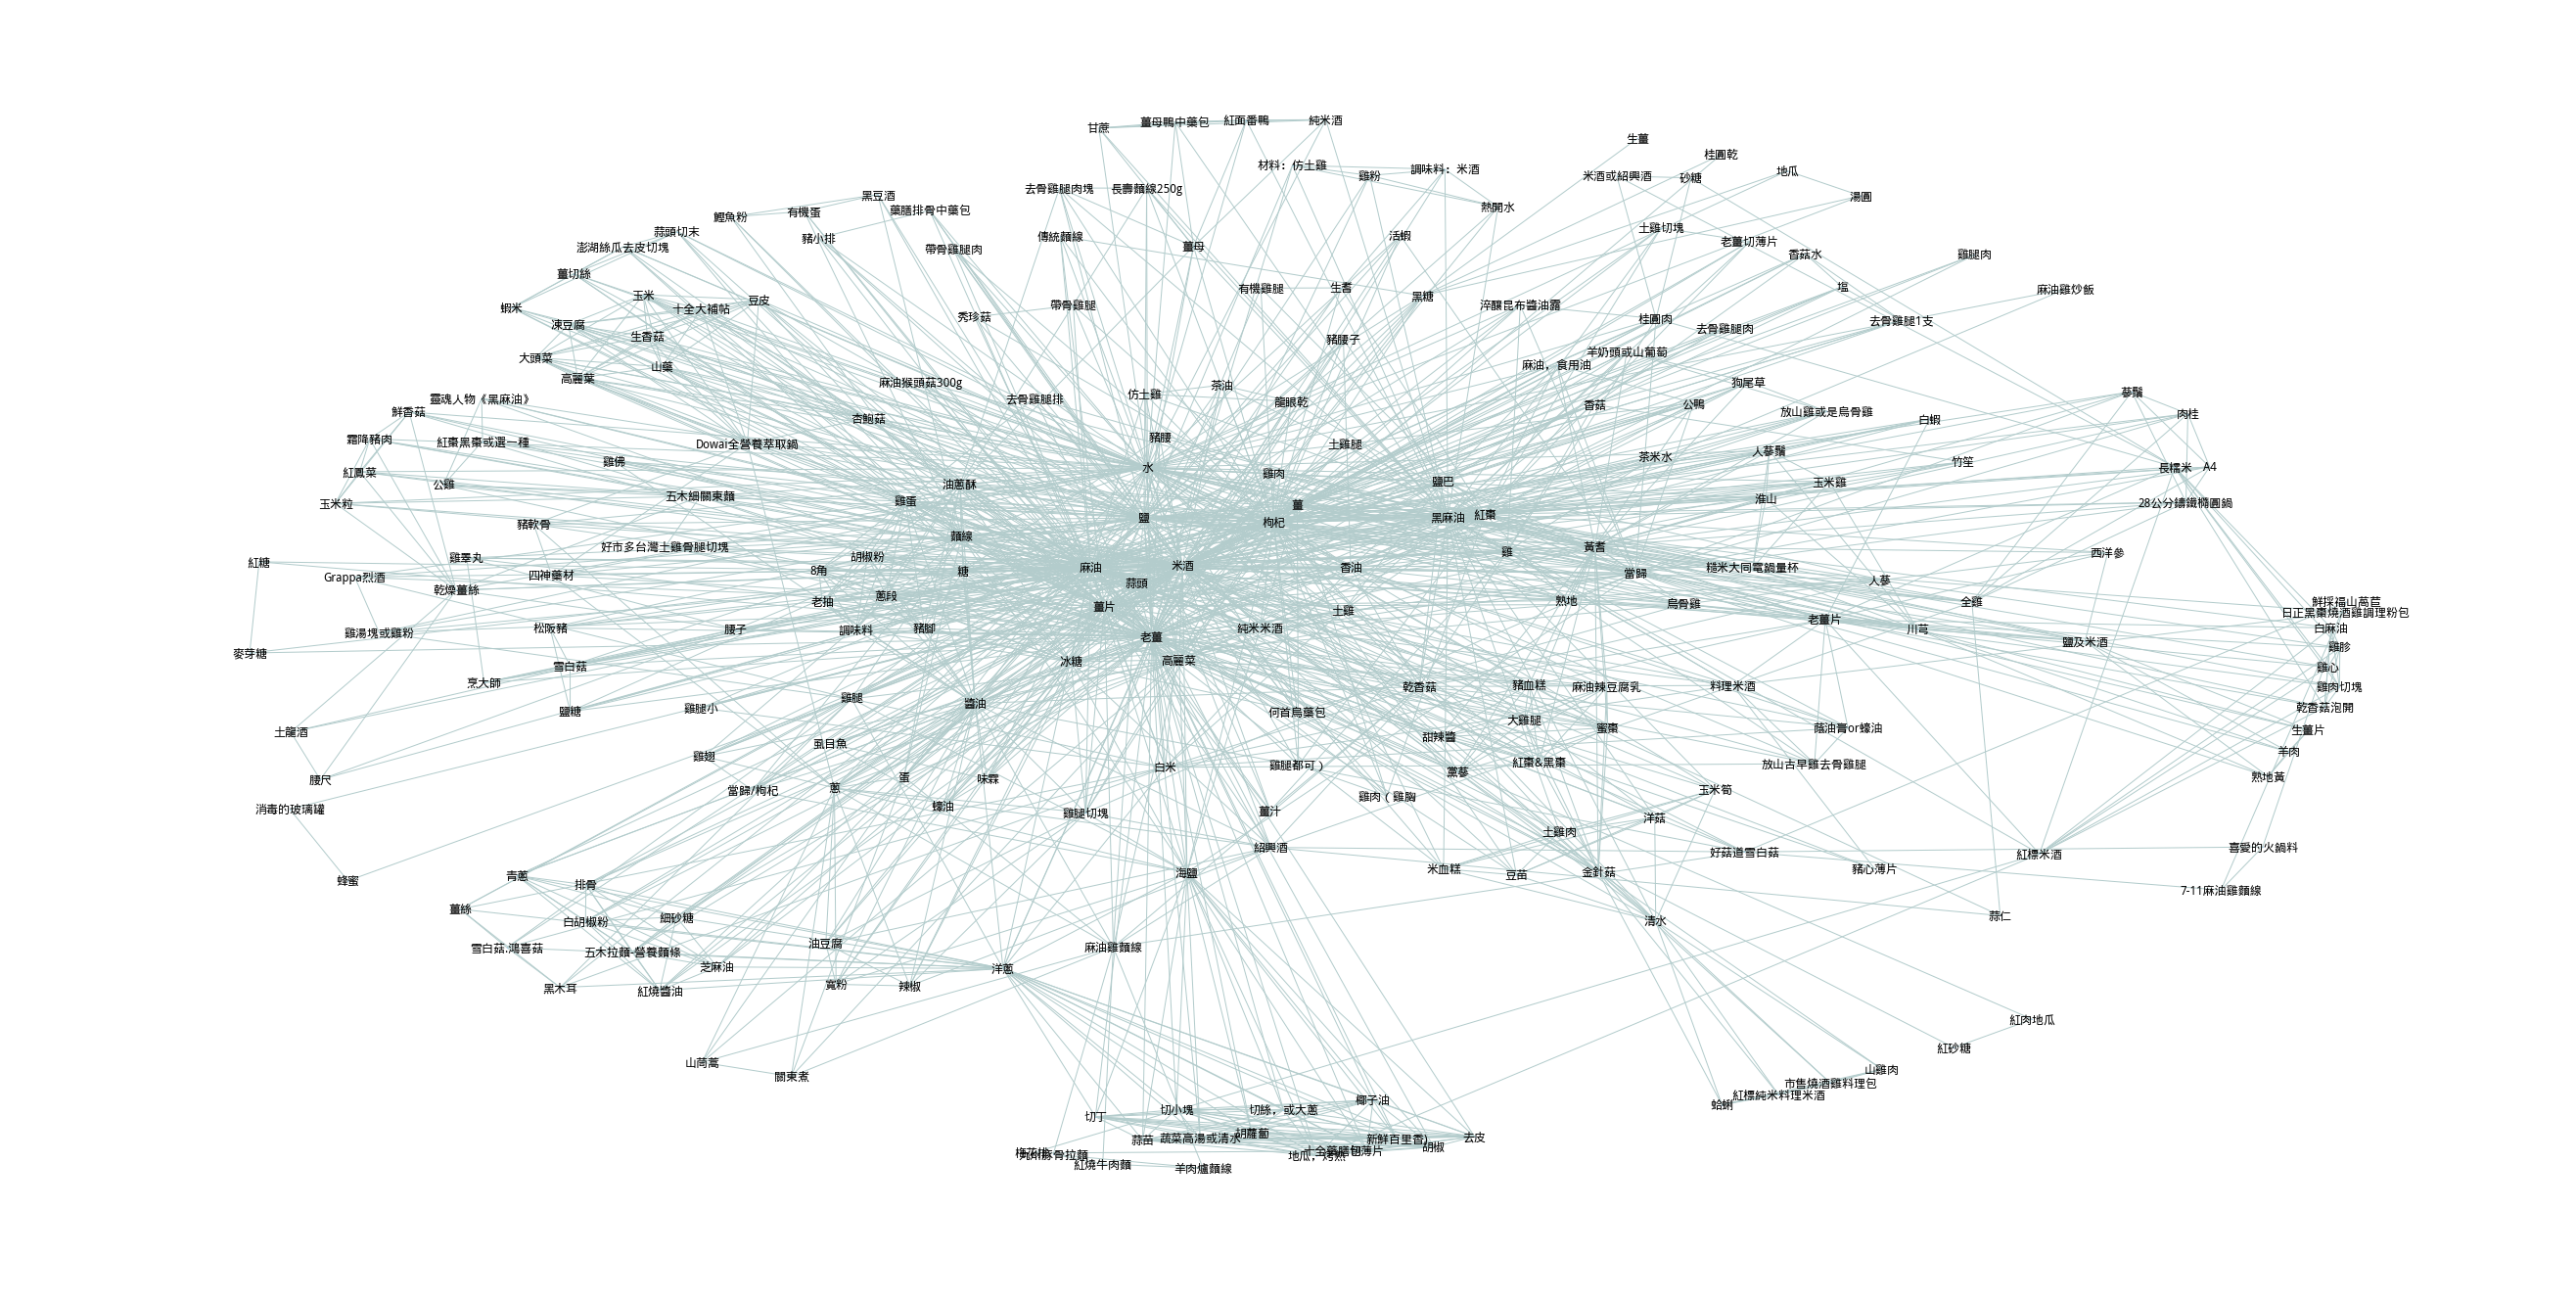

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('winter_recipe.png', dpi=100)

In [11]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('米酒', 132), ('麻油', 112), ('老薑', 100), ('水', 87), ('枸杞', 84), ('鹽', 77), ('薑片', 66), ('黑麻油', 58), ('紅棗', 50), ('醬油', 42), ('黃耆', 42), ('高麗菜', 40), ('冰糖', 36), ('麵線', 35), ('當歸', 33)]

Closeness centrality: [('米酒', 0.6771428571428572), ('麻油', 0.6405405405405405), ('老薑', 0.6124031007751938), ('水', 0.5969773299748111), ('枸杞', 0.5910224438902744), ('鹽', 0.5752427184466019), ('黑麻油', 0.5537383177570093), ('薑片', 0.5537383177570093), ('紅棗', 0.5386363636363637), ('黃耆', 0.5337837837837838), ('高麗菜', 0.5243362831858407), ('醬油', 0.5152173913043478), ('當歸', 0.512987012987013), ('薑', 0.512987012987013), ('冰糖', 0.5118790496760259)]

Degree centrality: [('米酒', 0.5569620253164557), ('麻油', 0.4725738396624472), ('老薑', 0.42194092827004215), ('水', 0.36708860759493667), ('枸杞', 0.3544303797468354), ('鹽', 0.32489451476793246), ('薑片', 0.27848101265822783), ('黑麻油', 0.24472573839662445), ('紅棗', 0.21097046413502107), ('醬油', 0.1772151898734177), ('黃耆', 0.1772151898734177), ('高麗菜', 0.16877637130801687), ('冰

In [12]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 28203.0
Total edges in the graph: 1512
Density: 0.0536

Name: 
Type: Graph
Number of nodes: 238
Number of edges: 1512
Average degree:  12.7059


In [13]:
occurence = [(g[0], len(list(g[1]))) for g in itertools.groupby(result)]
num = 0
for k in occurence:
    num = num + k[1]
print(num)
sorted(occurence, key = lambda x : x[1], reverse = True)[:10]

2388


[(('紅面番鴨', '水'), 2),
 (('薑母', '水'), 2),
 (('黑麻油', '水'), 2),
 (('薑母鴨中藥包', '水'), 2),
 (('甘蔗', '水'), 2),
 (('水', '純米酒'), 2),
 (('土雞', '老薑'), 1),
 (('土雞', '紅棗'), 1),
 (('土雞', '枸杞'), 1),
 (('土雞', '麻油'), 1)]

In [14]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

132


In [15]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.5076
